In [2]:
import utils

import numpy as np
import skimage
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.filters import frangi
from skimage.morphology import remove_small_objects, binary_dilation, binary_erosion


np.random.seed(42)

In [3]:
def detect_blood_vessels_using_image_processing(image, mask):
    
    green_channel = image[:,:,1]
    blured = cv.GaussianBlur(green_channel, (3, 3), 50)
    weighted = cv.addWeighted(green_channel, 2, blured, 1, 10)
    franged = frangi(weighted)
    normalized = utils.normalize_image(franged)*255
    _, thresholded = cv.threshold(normalized, 2.5, 255, cv.THRESH_BINARY)

    filtered = remove_small_objects(thresholded>0, 5000)
    for i in range(4):
        filtered = binary_erosion(filtered)
        if i%2 == 1:
            filtered = binary_dilation(filtered)
    filtered = binary_dilation(filtered)
    

    final_img = filtered * mask[:,:,0]

    return final_img

In [4]:
X_images, y_images = utils.load_all_images()

Loading sets ('dr', 'g', 'h') of images: 100%|█████████████████████████████████████████| 15/15 [00:12<00:00,  1.19it/s]


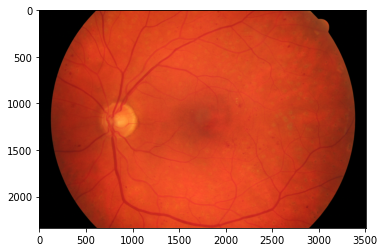

In [5]:
img, mask, manual = *X_images[0], y_images[0]

In [7]:
result = detect_blood_vessels_using_image_processing(img, mask)

In [8]:
utils.print_metrics(manual, result)

Confusion matrix:

  313132  |  103150  
--------------------
  195087  | 7573975  

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.62      0.98      0.78      0.63   7677125
        255       0.75      0.62      0.99      0.68      0.78      0.59    508219

avg / total       0.96      0.96      0.64      0.96      0.78      0.63   8185344



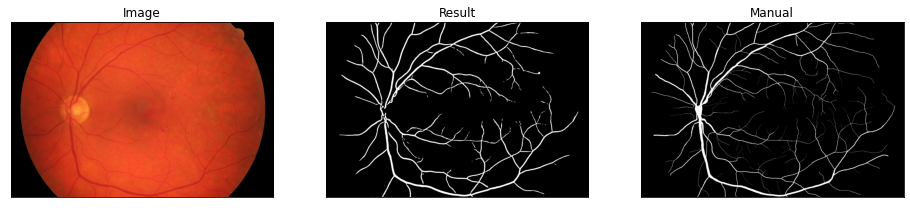

In [11]:
utils.visualize(image=img, manual=manual, result=result)

# Test

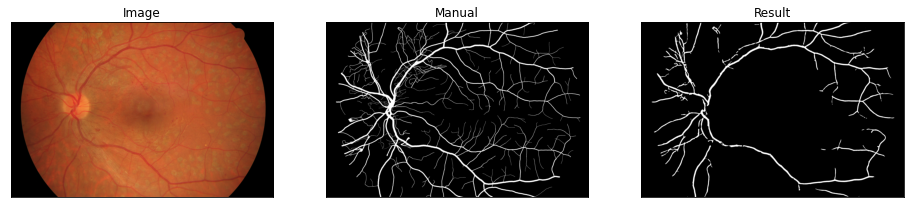

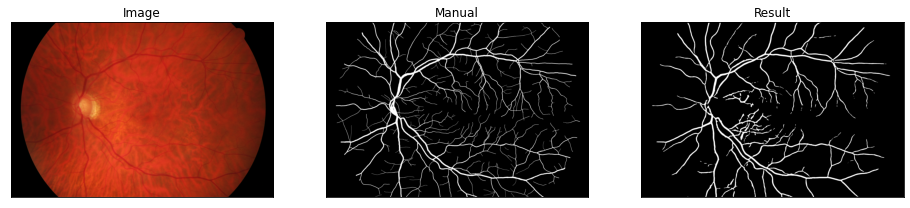

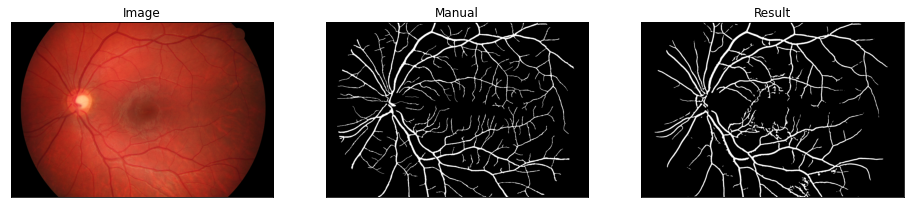

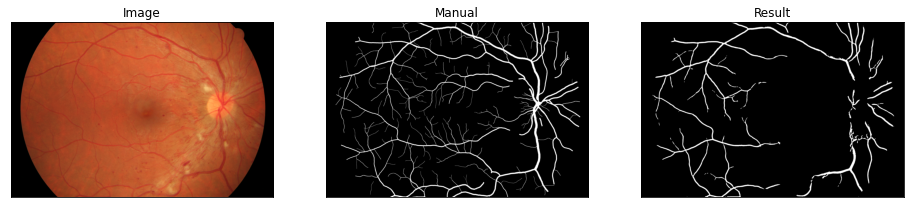

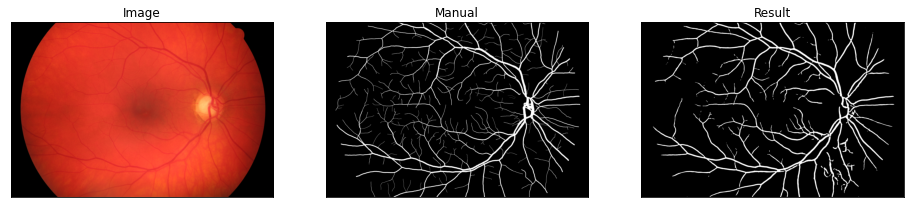

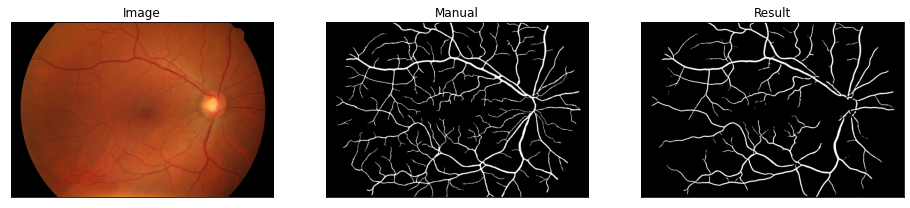

<Figure size 432x288 with 0 Axes>

In [13]:
for i in range(len(X_images)-6, len(X_images)):
    img, mask, manual = *X_images[i], y_images[i]
    result = detect_blood_vessels_using_image_processing(img, mask)
    utils.visualize(
        image=img,
        result=result,
        manual=manual,
        )